## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [248]:
# Your code here - remember to use markdown cells for comments as well!

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [250]:
#title_basic=pd.read_csv('name.basics.csv')
budget_df=pd.read_csv('tn.movie_budgets.csv')
#ratings_df=pd.read_csv('title.ratings.csv')

##### How many Rows and Columns we have in the dataset.

In [251]:
budget_df.shape

(5782, 6)

##### Checking datatypes of our columns

In [252]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


##### Checking for missing data

In [253]:
budget_df.isna().any()

id                   False
release_date         False
movie                False
production_budget    False
domestic_gross       False
worldwide_gross      False
dtype: bool

From the dataset, It is observed that we do not have any null values.

In [254]:
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Data Cleaning and Transformation

We have columns that currently we cannot perform any analysis on. 
Therefore we need to Transform the columns to something that we can work with. These columns are :
    release_date, production_budget, domestic_gross, worldwide_gross


###### Convert the date column

In [255]:
budget_df['release_date'] = pd.to_datetime(budget_df["release_date"], format='%b %d, %Y')
budget_df['release_date'] = budget_df['release_date'].dt.strftime("%Y-%m-%d")
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


###### Cleaning production_budget, domestic_gross and worldwide_gros columns

In [256]:
def scientific_to_decimal(scientific):
    return float(scientific)

In [257]:
# Remove dollar signs and commas from specific columns and convert to numeric values
columns_to_clean = ['production_budget', 'domestic_gross', 'worldwide_gross']

for column in columns_to_clean:
    budget_df[column] = budget_df[column].str.replace('$', '').str.replace(',', '').apply(scientific_to_decimal)

C:\Users\brian kipkemboi\AppData\Local\Temp\ipykernel_18864\569771311.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  budget_df[column] = budget_df[column].str.replace('$', '').str.replace(',', '').apply(scientific_to_decimal)


In [258]:
#budget_df.head()

In [259]:
#budget_df.info()

Now that we are set, We can begin our analysis using the cleaned dataset

##### Movies Released Per year.

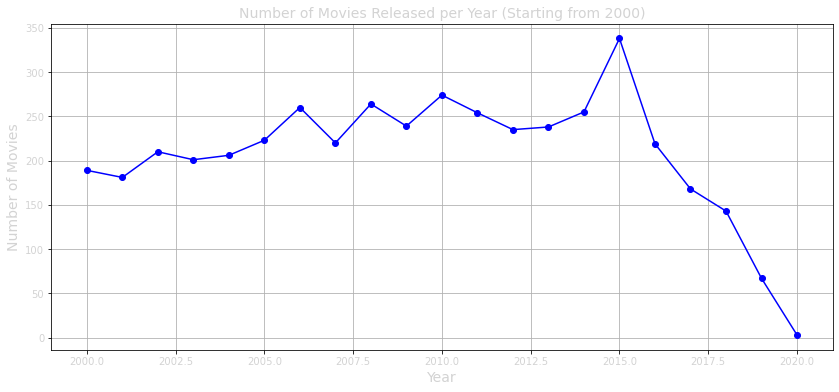

In [260]:
# Convert the 'release_date' column to a DateTime format
budget_df['release_date'] = pd.to_datetime(budget_df['release_date'])
# Extract the release year from the 'release_date' column
budget_df['release_year'] = budget_df['release_date'].dt.year
# Group the data by release year and count the number of movies in each year
# Filter the data for movies released from 2000 and onwards
df_filtered = budget_df[budget_df['release_year'] >= 2000]
movies_per_year = df_filtered['release_year'].value_counts().sort_index()
# Convert the year to integer
years = movies_per_year.index.astype(int)
# Display the count of movies released per year
# Create a line chart
plt.figure(figsize=(14, 6))
plt.plot(years, movies_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Number of Movies Released per Year (Starting from 2000)', color="lightgrey", fontsize=14)
plt.xlabel('Year', color="lightgrey", fontsize=14)
plt.xticks(color="lightgrey")
plt.ylabel('Number of Movies', color="lightgrey", fontsize=14)
plt.yticks(color="lightgrey")
plt.grid(True)
# Display the line chart
plt.show()

##### 1. Movie with the highest and lowest production budget

In [261]:
high_budget_movie = budget_df['movie'].loc[budget_df['production_budget'].idxmax()]
high_budget_amount = budget_df['production_budget'].loc[budget_df['production_budget'].idxmax()]
low_budget_movie = budget_df['movie'].loc[budget_df['production_budget'].idxmin()]
low_budget_amount = budget_df['production_budget'].loc[budget_df['production_budget'].idxmin()]

In [262]:
print(f"The movie with the highest production budget is {high_budget_movie}, with production budget at: ${high_budget_amount}")
print(f"The movie with the lowest production budget is {low_budget_movie}, with production budget at: ${low_budget_amount}")

The movie with the highest production budget is Avatar, with production budget at: $425000000.0
The movie with the lowest production budget is My Date With Drew, with production budget at: $1100.0


##### 2. Movie with the highest and lowest Domestic Gross

In [263]:
high_domestic_movie = budget_df['movie'].loc[budget_df['domestic_gross'].idxmax()]
high_domestic_amount = budget_df['domestic_gross'].loc[budget_df['domestic_gross'].idxmax()]
low_domestic_movie = budget_df['movie'].loc[budget_df['domestic_gross'].idxmin()]
low_domestic_amount = budget_df['domestic_gross'].loc[budget_df['domestic_gross'].idxmin()]

In [264]:
print(f"The movie with highest domestic gross value is {high_domestic_movie}, with ${high_domestic_amount}")
print(f"The movie with lowest domestic gross value is {low_domestic_movie}, with ${low_domestic_amount}")

The movie with highest domestic gross value is Star Wars Ep. VII: The Force Awakens, with $936662225.0
The movie with lowest domestic gross value is Moonfall, with $0.0


##### 3. Movie with the highest  and lowest Worldwide Gross

In [265]:
high_worldwide_movie = budget_df['movie'].loc[budget_df['worldwide_gross'].idxmax()]
high_worldwide_amount = budget_df['worldwide_gross'].loc[budget_df['worldwide_gross'].idxmax()]
low_worldwide_movie = budget_df['movie'].loc[budget_df['worldwide_gross'].idxmin()]
low_worldwide_amount = budget_df['worldwide_gross'].loc[budget_df['worldwide_gross'].idxmin()]

In [266]:
print(f"The movie with the highest worldwide gross value is {high_worldwide_movie}, with: ${high_worldwide_amount}")
print(f"The movie with the lowest worldwide gross value is {low_worldwide_movie}, with: ${low_worldwide_amount}")

The movie with the highest worldwide gross value is Avatar, with: $2776345279.0
The movie with the lowest worldwide gross value is Moonfall, with: $0.0
